In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set1')

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 2000)

In [3]:
#Train dataset
df= pd.read_csv('Train.csv')
df.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0


In [4]:
#Test dataset
tdf= pd.read_csv('Test.csv')
tdf.shape

(100000, 18)

In [5]:
description= pd.read_csv('VariableDefinitions.csv')
description

,Variable,Description
0,user_id,unique customer identifier
1,REGION,the location of each client
2,TENURE,duration in the network
3,MONTANT,top-up amount
4,FREQUENCE_RECH,number of times the customer refilled
5,REVENUE,monthly income of each client
6,ARPU_SEGMENT,income over 90 days / 3
7,FREQUENCE,number of times the client has made an income
8,DATA_VOLUME,number of connections
9,ON_NET,inter expresso call


In [6]:
df.shape

(400000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

The training data contained 400000 observations and 19 attributes---14 are numeric, while 5 are categorical columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTANT,259723.0,5522.971346,7099.640630,20.0,1000.0,3000.0,7300.0,226550.0
FREQUENCE_RECH,259723.0,11.503733,13.275514,1.0,2.0,6.0,15.0,133.0
REVENUE,265337.0,5505.487757,7175.802367,1.0,1000.0,3000.0,7340.0,233413.0
ARPU_SEGMENT,265337.0,1835.167658,2391.929290,0.0,333.0,1000.0,2447.0,77804.0
FREQUENCE,265337.0,13.951835,14.679943,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,203146.0,3369.763441,12281.867504,0.0,0.0,267.0,2925.0,934576.0
ON_NET,254181.0,275.917586,873.593034,0.0,5.0,27.0,155.0,45011.0
ORANGE,233683.0,95.532927,204.733272,0.0,7.0,29.0,99.0,6788.0
TIGO,160614.0,23.134608,63.061871,0.0,2.0,6.0,20.0,2758.0
ZONE1,31690.0,7.874282,35.642843,0.0,0.0,1.0,3.0,1657.0


In [9]:
missing_values= 100 -((df.notnull().sum()/df.shape[0])*100)
missing_values

user_id            0.00000
REGION            39.38000
TENURE             0.00000
MONTANT           35.06925
FREQUENCE_RECH    35.06925
REVENUE           33.66575
ARPU_SEGMENT      33.66575
FREQUENCE         33.66575
DATA_VOLUME       49.21350
ON_NET            36.45475
ORANGE            41.57925
TIGO              59.84650
ZONE1             92.07750
ZONE2             93.62175
MRG                0.00000
REGULARITY         0.00000
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
CHURN              0.00000
dtype: float64

There are considerable missing values in 14 out of 19 columns.

Text(0.5, 1.0, 'Distribution of customers by churn')

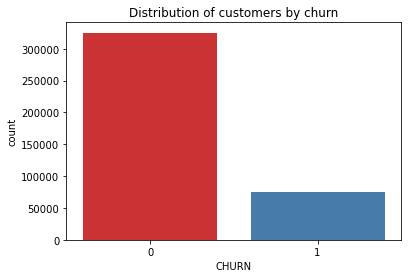

In [10]:
sns.countplot(df['CHURN'])
plt.title('Distribution of customers by churn')

In [11]:
df['CHURN'].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

The target variable has imbalanced classes, we have more of loyal customers than customers who churned. 

In [12]:
df['REGION'].value_counts()

DAKAR          95517
THIES          33374
SAINT-LOUIS    22125
LOUGA          18513
KAOLACK        18042
DIOURBEL       12576
TAMBACOUNDA    10273
KAFFRINE        8181
KOLDA           7204
FATICK          6638
MATAM           5255
ZIGUINCHOR      4012
SEDHIOU          589
KEDOUGOU         181
Name: REGION, dtype: int64

This data was collected from the Senegal market.
Dakar is the most popular city where the customers are from.

In [13]:
df['TENURE'].value_counts()

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

More of the customers have been with the company for more than 2 years

In [14]:
df['MRG'].nunique() 

1

This feature has just one unique value, which gives no information. #drop this column

In [15]:
df['TOP_PACK'].nunique()

111

In [16]:
df['TOP_PACK'].value_counts()

All-net 500F=2000F;5d                                58675
On net 200F=Unlimited _call24H                       28387
Data:490F=1GB,7d                                     21661
Data: 100 F=40MB,24H                                 15590
Mixt 250F=Unlimited_call24H                          12712
MIXT:500F= 2500F on net _2500F off net;2d            12020
Data:1000F=2GB,30d                                   11205
All-net 500F =2000F_AllNet_Unlimited                  8625
Jokko_Daily                                           8436
Data: 200 F=100MB,24H                                 8086
IVR Echat_Daily_50F                                   5264
On-net 500=4000,10d                                   4955
On-net 500F_FNF;3d                                    4135
Data:200F=Unlimited,24H                               4049
MIXT: 200mnoff net _unl on net _5Go;30d               3553
On-net 1000F=10MilF;10d                               3409
VAS(IVR_Radio_Daily)                                  27

In [17]:
df['TOP_PACK']= df['TOP_PACK'].fillna('Others')

In [18]:
pd.crosstab(df.CHURN, df.TOP_PACK, normalize='index')

TOP_PACK,1000=Unlimited7Day,200=Unlimited1Day,200=unlimited pilot auto,200F=10mnOnNetValid1H,301765007,305155009,500=Unlimited3Day,APANews_monthly,APANews_weekly,All-net 1000=5000;5d,All-net 1000F=(3000F On+3000F Off);5d,All-net 300=600;2d,All-net 5000= 20000off+20000on;30d,All-net 500F =2000F_AllNet_Unlimited,All-net 500F=1250F_AllNet_1250_Onnet;48h,All-net 500F=2000F;5d,All-net 500F=4000F ; 5d,All-net 600F= 3000F ;5d,CVM_100F_unlimited,CVM_100f=200 MB,CVM_200f=400MB,CVM_500f=2GB,CVM_On-net 1300f=12500,CVM_On-net 400f=2200F,CVM_on-net bundle 500=5000,"Data: 100 F=40MB,24H","Data: 200 F=100MB,24H","Data: 200F=1GB,24H","Data: 490F=Night,00H-08H","Data:1000F=2GB,30d","Data:1000F=5GB,7d","Data:1500F=3GB,30D","Data:1500F=SPPackage1,30d","Data:150F=SPPackage1,24H","Data:200F=Unlimited,24H","Data:3000F=10GB,30d","Data:300F=100MB,2d",Data:30Go_V 30_Days,"Data:490F=1GB,7d","Data:500F=2GB,24H",Data:50F=30MB_24H,"Data:700F=1.5GB,7d","Data:700F=SPPackage1,7d",Data:DailyCycle_Pilot_1.5GB,Data:New-GPRS_PKG_1500F,DataPack_Incoming,Data_EVC_2Go24H,EVC_100Mo,EVC_500=2000F,EVC_Jokko_Weekly,EVC_MEGA10000F,FIFA_TS_daily,FNF2 ( JAPPANTE),FNF_Youth_ESN,Facebook_MIX_2D,GPRS_3000Equal10GPORTAL,IVR Echat_Daily_50F,IVR Echat_Monthly_500F,IVR Echat_Weekly_200F,Incoming_Bonus_woma,Internat: 1000F_Zone_1;24H\t\t,Internat: 1000F_Zone_3;24h\t\t,Internat: 2000F_Zone_2;24H\t\t,Jokko_Daily,Jokko_Monthly,Jokko_Weekly,Jokko_promo,MIXT: 200mnoff net _unl on net _5Go;30d,MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t,"MIXT: 4900F= 10H on net_1,5Go ;30d",MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t,"MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t",MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t,MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t,MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d,MIXT:500F= 2500F on net _2500F off net;2d,MROMO_TIMWES_OneDAY,MROMO_TIMWES_RENEW,Mixt 250F=Unlimited_call24H,Mixt : 500F=2500Fonnet_2500Foffnet ;5d,NEW_CLIR_PERMANENT_LIBERTE_MOBILE,NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE,New_YAKALMA_4_ALL,On net 200F= 3000F_10Mo ;24H,On net 200F=Unlimited _call24H,On-net 1000F=10MilF;10d,On-net 2000f_One_Month_100H; 30d,On-net 200F=60mn;1d,On-net 300F=1800F;3d,"On-net 500=4000,10d",On-net 500F_FNF;3d,Others,Pilot_Youth1_290,Pilot_Youth4_490,SUPERMAGIK_1000,SUPERMAGIK_5000,Staff_CPE_Rent,TelmunCRBT_daily,Twter_U2opia_Daily,Twter_U2opia_Monthly,Twter_U2opia_Weekly,VAS(IVR_Radio_Daily),VAS(IVR_Radio_Monthly),VAS(IVR_Radio_Weekly),WIFI_ Family _10MBPS,WIFI_ Family _4MBPS,WIFI_Family_2MBPS,"YMGX 100=1 hour FNF, 24H/1 month",Yewouleen_PKG,pack_chinguitel_24h,pilot_offer5,pilot_offer6
CHURN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000012,0.000695,0.000003,0.000055,0.000003,0.000006,0.000043,0.000003,0.000003,0.003171,0.001159,0.000843,0.000163,0.026067,0.001578,0.174605,0.000055,0.005650,0.000003,0.000006,0.000012,0.000009,0.000006,0.000003,0.000298,0.045698,0.023392,0.000037,0.000215,0.032664,0.007587,0.000514,0.000271,0.000858,0.011622,0.001796,0.001362,0.000320,0.062447,0.002962,0.001378,0.000409,0.000065,0.000886,0.000003,0.000098,0.000006,0.000015,0.000077,0.000006,0.000003,0.000074,0.000154,0.000012,0.000351,0.000003,0.015494,0.000009,0.000049,0.000022,0.000141,0.000025,0.000012,0.024739,0.000255,0.000058,0.000486,0.010721,0.001578,0.000034,0.000046,0.000101,0.000886,0.000062,0.000141,0.036124,0.000326,0.000295,0.037431,0.000037,0.000006,0.000003,0.000160,0.00099,0.085633,0.010361,0.000132,0.003694,0.000409,0.014744,0.012074,0.313031,0.000237,0.000323,0.000114,0.000169,0.000037,0.000043,0.006557,0.000218,0.003238,0.008159,0.000049,0.000015,0.000006,0.000046,0.000237,0.000261,0.000231,0.000003,0.000003,0.000003
1,0.000000,0.000013,0.000000,0.000040,0.000000,0.000000,0.000013,0.000000,0.000000,0.001096,0.000174,0.000294,0.000013,0.001991,0.000187,0.025399,0.000000,0.001069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.009767,0.006413,0.000000,0.000160,0.007803,0.003648,0.

Majority of those who churned were not using the top active packs.

In [19]:
df['FREQ_TOP_PACK'].value_counts()

1.0      46985
2.0      28936
3.0      21657
4.0      15857
5.0      12756
6.0      10651
7.0       9272
8.0       8191
9.0       7107
10.0      6348
11.0      5768
12.0      5258
13.0      4698
14.0      4072
15.0      3749
16.0      3200
17.0      2912
18.0      2562
19.0      2449
20.0      2183
22.0      1944
21.0      1920
23.0      1695
24.0      1575
25.0      1471
26.0      1330
27.0      1175
28.0      1133
29.0      1050
30.0       970
32.0       854
31.0       853
34.0       755
33.0       743
35.0       644
36.0       580
38.0       567
37.0       548
39.0       543
40.0       491
42.0       438
41.0       418
43.0       358
44.0       340
45.0       324
47.0       311
48.0       302
46.0       284
49.0       269
50.0       255
55.0       223
52.0       219
51.0       219
53.0       207
54.0       188
57.0       171
59.0       159
60.0       157
56.0       150
61.0       145
58.0       144
62.0       126
63.0       123
64.0       105
66.0       103
68.0        93
65.0      

Text(0.5, 1.0, 'Distribution of active packs by regularity')

C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


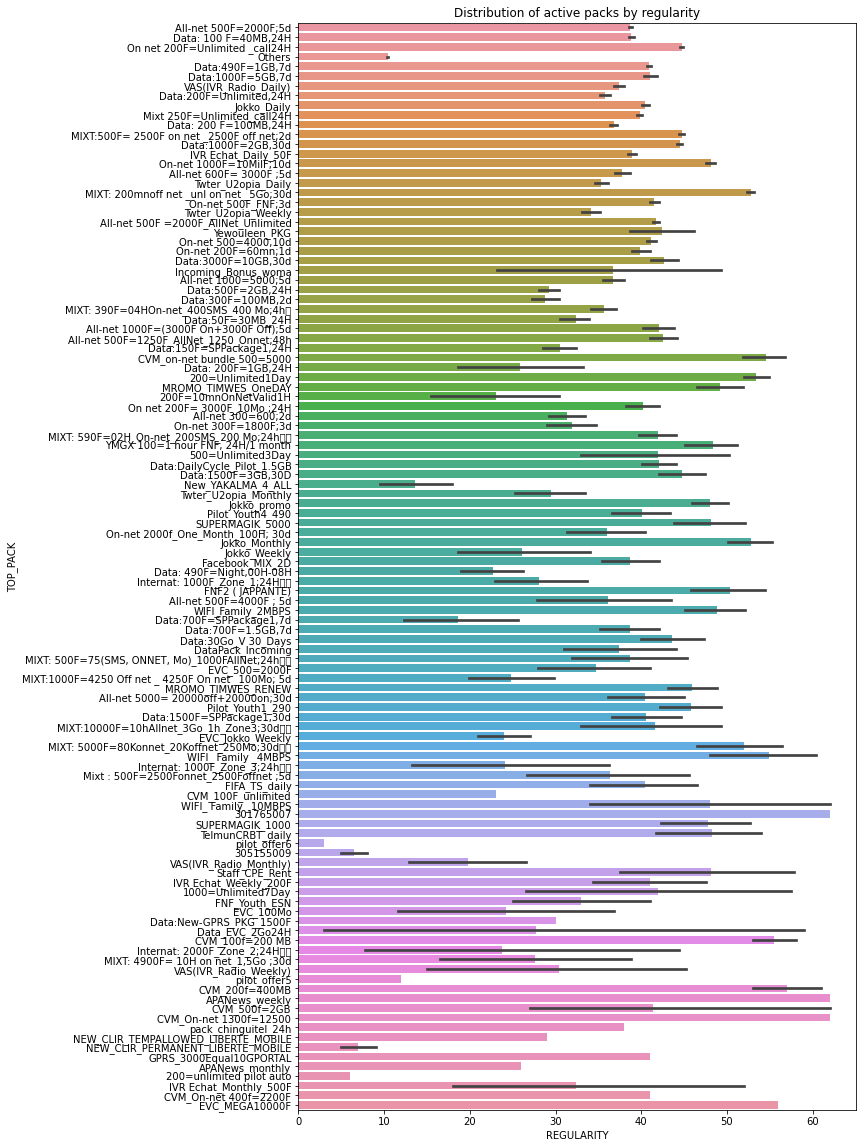

In [20]:
plt.figure(figsize=(10,20))
sns.barplot(x= 'REGULARITY', y= 'TOP_PACK', data= df)
plt.title('Distribution of active packs by regularity')

On the average, customers under 'Others', that is those who were not using the top active packs were active for about 10 times in 90 days

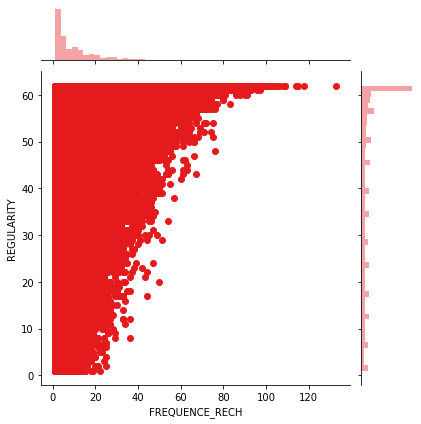

In [21]:
sns.jointplot(x=df.FREQUENCE_RECH, y=df.REGULARITY, data=df)

Text(0.5, 1.0, 'Distribution of churn by top-up amount')

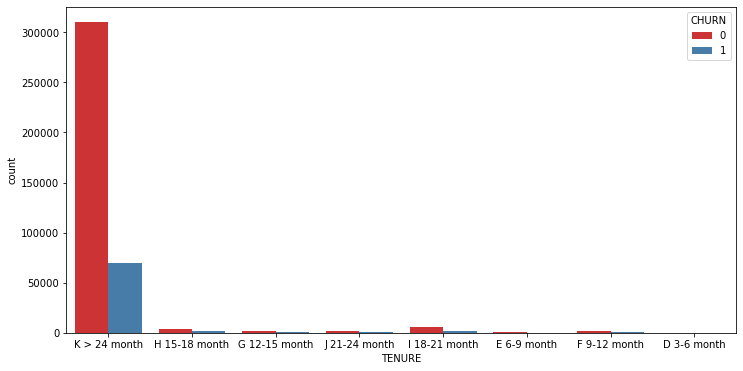

<Figure size 864x576 with 0 Axes>

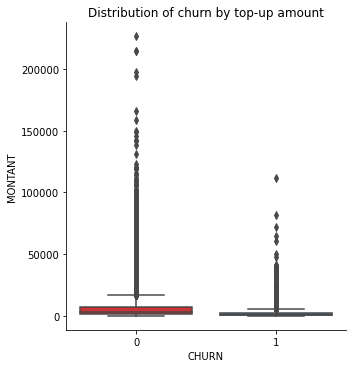

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x= df.TENURE, hue= df.CHURN, data=df)
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="MONTANT", kind= 'box', data=df)
plt.title('Distribution of churn by top-up amount')

In [23]:
pd.crosstab(df.CHURN, df.TENURE, normalize= 'index')

TENURE,D 3-6 month,E 6-9 month,F 9-12 month,G 12-15 month,H 15-18 month,I 18-21 month,J 21-24 month,K > 24 month
CHURN,,,,,,,,
0,0.000400,0.000953,0.004029,0.005889,0.010912,0.018733,0.005527,0.953558
1,0.000241,0.000655,0.006159,0.011664,0.017503,0.029675,0.007055,0.927048


Majority of those who churned have been customers for more than two years.  #Use label encoding for this variable

In [24]:
pd.crosstab(df.CHURN, df.REGION, normalize= 'index')

REGION,DAKAR,DIOURBEL,FATICK,KAFFRINE,KAOLACK,KEDOUGOU,KOLDA,LOUGA,MATAM,SAINT-LOUIS,SEDHIOU,TAMBACOUNDA,THIES,ZIGUINCHOR
CHURN,,,,,,,,,,,,,,
0,0.39342,0.051324,0.027443,0.034164,0.074004,0.000727,0.029951,0.076516,0.021558,0.091714,0.002394,0.042456,0.137896,0.016433
1,0.42066,0.080922,0.023734,0.010850,0.096067,0.001808,0.016727,0.067360,0.027803,0.066004,0.004295,0.037523,0.123644,0.022604


Majority of those who churned are from Dakar. #Fill missing values with 'missing'

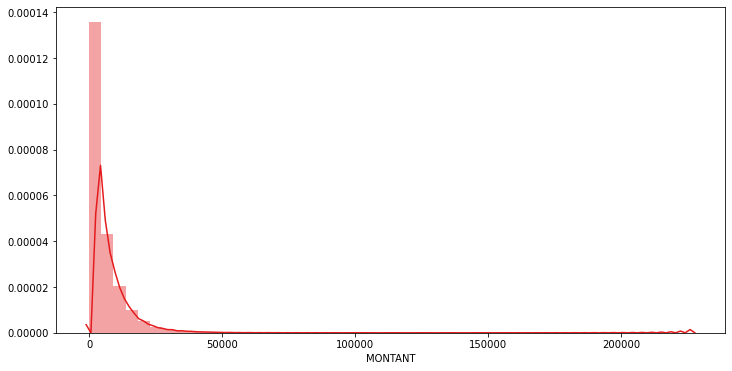

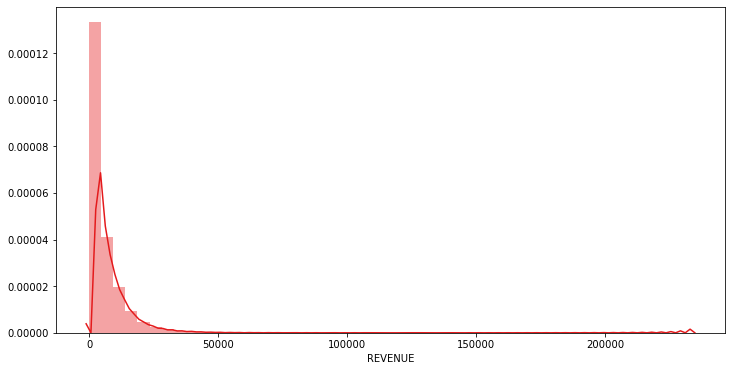

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(df['MONTANT'])

plt.figure(figsize=(12,6))
sns.distplot(df['REVENUE'])

Text(0.5, 1.0, 'Distribution of customers who churn by their top amount')

<Figure size 864x576 with 0 Axes>

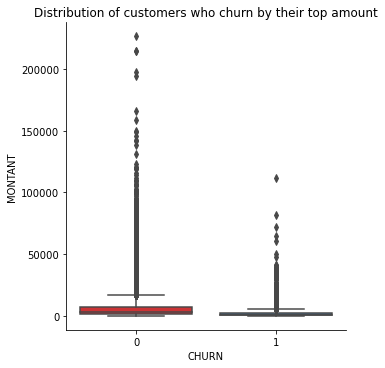

In [26]:
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="MONTANT", kind= 'box', data=df)
plt.title('Distribution of customers who churn by their top amount')

Text(0.5, 1.0, 'Distribution of churn by income')

<Figure size 864x576 with 0 Axes>

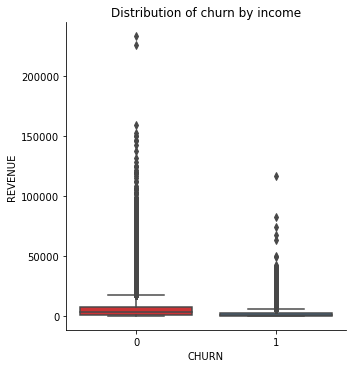

In [27]:
plt.figure(figsize=(12,8))
ax= sns.catplot(x="CHURN", y="REVENUE", kind= 'box', data=df)
plt.title('Distribution of churn by income')

Data on the top-up amount and the income of the customer are highly skewed as expected

<Figure size 864x576 with 0 Axes>

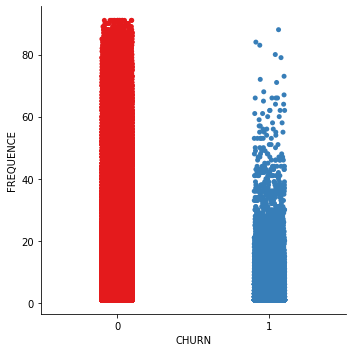

In [28]:
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="FREQUENCE", kind= 'strip', data=df)

Those who churned earned less frequently than those who did not

Text(0.5, 1.0, 'Distribution of churn by data volume')

<Figure size 864x576 with 0 Axes>

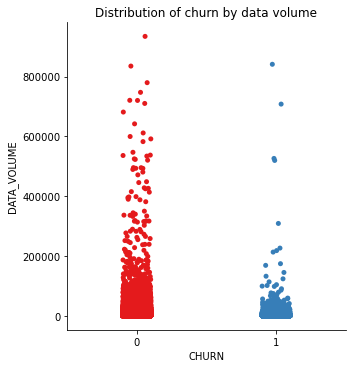

In [29]:
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="DATA_VOLUME", kind= 'strip', data=df)
plt.title('Distribution of churn by data volume')

Text(0.5, 1.0, 'Distribution of churn by call to TIGO')

<Figure size 864x576 with 0 Axes>

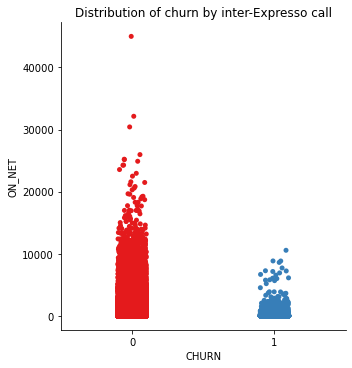

<Figure size 864x576 with 0 Axes>

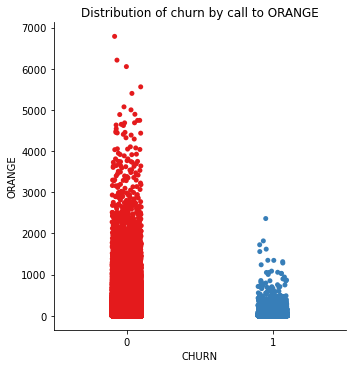

<Figure size 864x576 with 0 Axes>

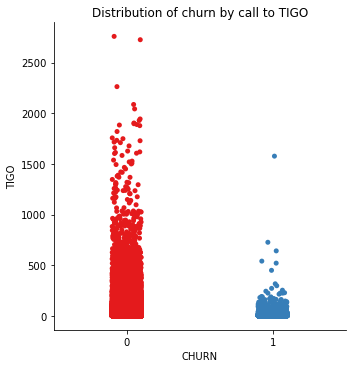

In [30]:
plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="ON_NET", kind= 'strip', data=df)
plt.title('Distribution of churn by inter-Expresso call')


plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="ORANGE", kind= 'strip', data=df)
plt.title('Distribution of churn by call to ORANGE')

plt.figure(figsize=(12,8))
sns.catplot(x="CHURN", y="TIGO", kind= 'strip', data=df)
plt.title('Distribution of churn by call to TIGO')

On the average, those who churned earned less and spent less to top up and for data volume. They also called less on either on Epresso, Tigo or Orange. 

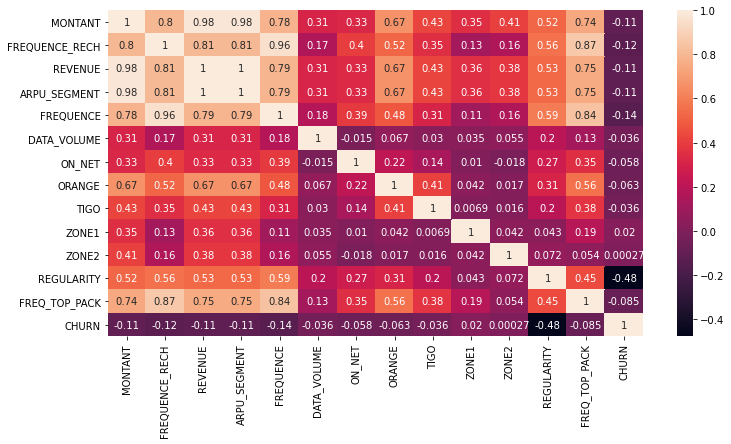

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True)

#### Suggestions for data cleaning 

1. Drop ARPU_SEGMENT (redundant) and MRG.

2. Fill NA of 'TOP_PACK' with 'others' and 'REGION' with 'missing'
3. Fill NA of 'FREQ_TOP_PACK' with 'Zeroes'
4. Fill NA of 'REVENUE','FREQUENCE','MONTANT', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO','ZONE1', 'ZONE2', 'FREQ_TOP_PACK' with arbitrary value (-99)